# 运用有监督机器学习分析文本 
## —— 以群众来信为例

## 1. 数据预处理

In [ ]:
import pandas as pd
import jieba.posseg as pseg
from sklearn.model_selection import train_test_split, cross_val_score
#from sklearn.算法位置 import 算法名 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import NMF
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
#evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

%matplotlib inline

#import sys
#from importlib import reload
#reload(sys)
#sys.setdefaultencoding('utf8')

In [ ]:
#载入停词
stopwords = [k.strip() for k in open('cn_stopwords.txt', encoding='utf8').readlines() if k.strip() != '']
stopwords[:10]

In [ ]:
cixing = ["x","zg","uj","ul","e","d","uz","y","m","eng",'ns','nr']
def cut(txt):
    result = ''
    try:
        for w in pseg.cut(txt):
            if not str(w.flag) in cixing:
                seg=w.word
                if seg not in stopwords:
                    result += seg + ' '
    except:
        pass
    return result

In [ ]:
#读取训练集并进行清洗
codegroupA = pd.read_excel('trainingset.xlsx')
pd.set_option('display.max_columns', None)
codegroupA.head()

In [ ]:
try:
    codegroupA['parsed']
except:
    codegroupA['parsed'] = codegroupA.content.apply(cut)

In [ ]:
pd.set_option("max_colwidth",1000)
codegroupA.content[codegroupA.t1== 1][6:9]

In [ ]:
codegroupA.parsed[codegroupA.t1== 1][6:9]

In [ ]:
#将训练集投诉文本向量化
cv = CountVectorizer()
codegroupA['parsed'] = codegroupA.parsed.fillna('')
X = cv.fit_transform(codegroupA.parsed)

In [ ]:
print("Vocabulary",cv.vocabulary_)

In [ ]:
counts = pd.DataFrame(X.sum(axis=0))
counts.columns = cv.get_feature_names_out()
counts.T.sort_values(0)

In [ ]:
X.toarray()

In [ ]:
# 读取全样本数据
full = pd.read_excel('sampletext.xlsx')
#处理全样本中缺失值
full['content'] = full['content'].fillna('')
#清洗全样本投诉文本
full['parsed'] = full.content.apply(cut)
#保存清洗后的全样本（可不执行）
#full.to_csv('textparsed.csv', index=None,encoding='utf8')
#处理清洗后全样本投诉文本缺失值并向量化
full['parsed'] = full.parsed.fillna('')
dtm_full = cv.transform(full['parsed'])

## 2.训练模型

In [ ]:
#学习并预测主题1
y = codegroupA.t1

In [ ]:
#拆分训练集测试集
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size=0.3)

In [ ]:
# 模型名 = 算法名（参数).fit(训练集x，训练集y)
# LogisticRegression().fit（X，y）
# 算法名（）.get_params()获取参数信息
model = OneVsRestClassifier(LogisticRegression())
model.fit(train_x,train_y)

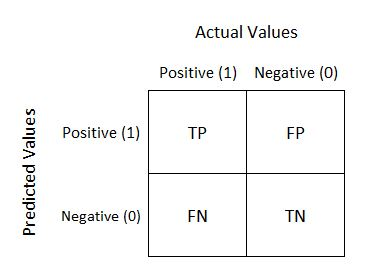

- Precision = TP / (TP + FP)
- Recall = TP / (TP + FN)

<img src="https://s3.amazonaws.com/stackabuse/media/understanding-roc-curves-python-2.png" width="500" height="340">

In [ ]:
#查看准确度
print(classification_report(test_y, model.predict(test_x)))

In [ ]:
#ROC
#define metrics
y_pred_proba = model.predict_proba(test_x)[::,1]
fpr, tpr, _ = roc_curve(test_y, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#Cross Validation 评估选择模型
for model_ in [RandomForestClassifier(), LogisticRegression(), SVC(), BernoulliNB()]:
    print(cross_val_score(OneVsRestClassifier(model_), X, y).mean())

In [ ]:
#选择最终模型预测sample文本
full['predict_t1'] = LogisticRegression().fit(X,y).predict(dtm_full)
full.content[full['predict_t1']==1]

In [ ]:
#学习并预测主题 2~15


In [ ]:
#学习并预测群体1
y = codegroupA.s1
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size=0.3)
model.fit(X, y)
model.fit(train_x, train_y)
#查看准确度
print(classification_report(test_y, model.predict(test_x)))

In [ ]:
for model_ in [RandomForestClassifier(), LogisticRegression(), SVC(), BernoulliNB()]:
    print(cross_val_score(OneVsRestClassifier(model_), X, y).mean())

In [ ]:
full['predict_s1'] = LogisticRegression().fit(X,y).predict(dtm_full)
#full.content[full['predict_s1']==1]